In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv('AV_HR_Analytics.csv')

In [73]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [74]:
df['region'].nunique()

34

In [75]:
df.shape

(54808, 14)

In [76]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [77]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [79]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

#### Missing Value imputation

In [80]:
from  sklearn.impute import SimpleImputer

In [81]:
imputer = SimpleImputer(strategy='most_frequent')
df[['education']] =  imputer.fit_transform(df[['education']])

In [82]:
imputer = SimpleImputer(strategy='median')
df[['previous_year_rating']] = imputer.fit_transform(df[['previous_year_rating']])

In [83]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

#### Outliers Analysis and Capping

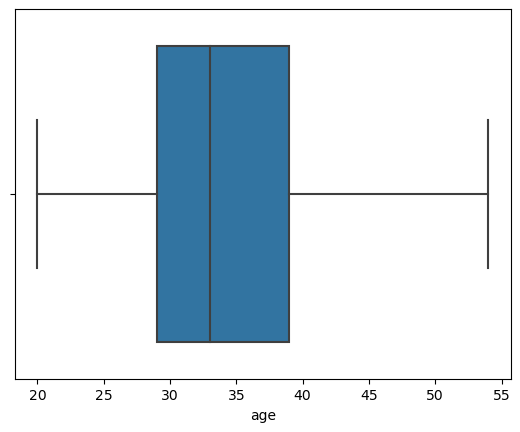

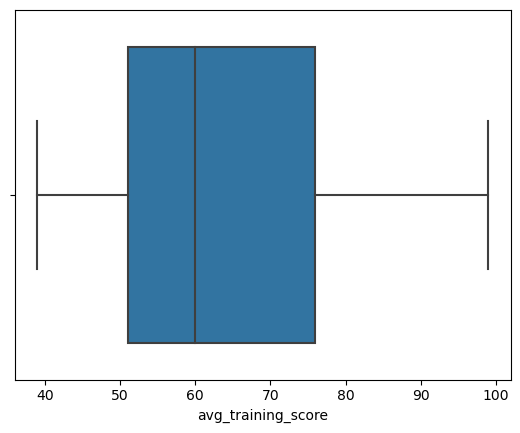

In [84]:
def capping_outlier(col):
    q1 = np.percentile(df[col],25)
    q3 = np.percentile(df[col],75)

    iqr = q3 - q1

    lower_bond = q1 - 1.5 * iqr
    upper_bond = q3 + 1.5 * iqr

    df[col] = np.clip(df[col], lower_bond, upper_bond)

num_cols = [
 'age',
 'avg_training_score',
 ]
for column in num_cols:
    capping_outlier(column)
    sns.boxplot(x=df[column], orient='h')
    plt.show()
    


In [85]:
df['is_promoted'].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [86]:
df.drop(columns=['employee_id'], inplace=True)

In [87]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [88]:

cat_cols  = df.select_dtypes(include='object').columns.to_list()

#### Label Encoding

In [89]:
from sklearn.preprocessing import LabelEncoder

In [90]:
df[cat_cols] = df[cat_cols].apply(LabelEncoder().fit_transform)


In [91]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,8,18,0,1,0,1,45,3.0,2,0,0,73,0


### Standardization

In [92]:
from sklearn.preprocessing import StandardScaler

In [94]:
columns_to_Standardize = df.columns[:-1]

scalar = StandardScaler()

scalar.fit(df[columns_to_Standardize])

df[columns_to_Standardize] = scalar.transform(df[columns_to_Standardize])

In [95]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0.808933,1.776526,1.619758,-1.536223,1.154111,-0.415276,0.038093,1.395766,0.500460,1.356878,-0.154018,-1.075931,0
1,-0.388183,-0.163034,-0.628838,0.650947,-0.885239,-0.415276,-0.636174,1.395766,-0.437395,-0.736986,-0.154018,-0.253282,0
2,0.808933,-0.619401,-0.628838,0.650947,1.154111,-0.415276,-0.096760,-0.250651,0.265996,-0.736986,-0.154018,-1.001145,0
3,0.808933,-0.048942,-0.628838,0.650947,-0.885239,1.226063,0.577506,-1.897069,0.969387,-0.736986,-0.154018,-1.001145,0
4,1.207972,0.293333,-0.628838,0.650947,-0.885239,-0.415276,1.386626,-0.250651,-0.906322,-0.736986,-0.154018,0.718939,0


### Applying the PCA for the First Time

In [135]:
# Saperate the input and output columns

x = df.drop(columns=['is_promoted'])
y = df['is_promoted']

In [136]:
# import the Packages

from sklearn.decomposition import PCA

In [143]:
# Fit the PCA model

pca = PCA(n_components=10)

pca.fit(x)

PCA(n_components=10)

In [144]:
# Transform the data 

pca_data = pca.transform(x)

In [145]:
# Make dataframe of PCA

new_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

In [146]:
# Add target column

new_df['is_promoted'] = df['is_promoted']

In [149]:
new_df.sample(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,is_promoted
14465,1.922625,0.093413,-0.689504,0.561483,0.069874,1.470164,-1.808943,-0.368162,1.290195,-0.738446,0
35333,0.160876,-0.879865,0.894528,0.772267,-1.126671,0.008851,0.610158,0.169906,1.107398,0.451124,0
27528,-1.744786,1.071609,2.116549,0.276430,-0.218097,-0.618872,0.328619,0.149457,0.101759,-0.067860,0
11309,1.397800,0.126823,0.522051,1.288719,-0.994007,0.192880,0.613129,1.192585,-0.662376,0.031356,1
27575,-1.427479,1.487726,-0.462737,0.248260,-0.073233,0.902699,-1.691817,-0.109296,0.064654,-0.792655,1


In [150]:
pca.explained_variance_ratio_.sum()

0.9191640198809661

### Train Test

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
x = new_df.drop(columns=['is_promoted'])
y = new_df['is_promoted']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Model Training
**Random Forest with Hyper-Parameter Tuning**

In [153]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
rf = RandomForestClassifier()

In [155]:
param_grid = {
    'n_estimators': [100, 200],
    "criterion":['gini','entropy'],
    'max_depth': [3, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'random_state': [0, 42]
}

In [156]:
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_search = GridSearchCV(rf,  # Base model
                           param_grid, # params 
                           scoring='accuracy', # metrix
                           cv=5, # cross validation
                           verbose=True,
                           n_jobs=-1)

In [157]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200], 'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [158]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'random_state': 0}

In [159]:
grid_search.best_score_

0.920813787243936

### Select Best Model and Calculate predictions

In [160]:
y_pred = grid_search.best_estimator_.predict(x_test)

In [162]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_score(y_test, y_pred)

0.9241014413428207

In [163]:
precision_score(y_test, y_pred)

0.8114754098360656

In [164]:
recall_score(y_test, y_pred)

0.10903083700440529

In [165]:
f1_score(y_test, y_pred)

0.19223300970873788

# Now working with test data 

In [196]:
df_test = pd.read_csv('test_data.csv')

In [197]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [198]:
imp_id = df_test['employee_id']

In [199]:
df_test.drop(columns=['employee_id'],inplace=True)

In [200]:
df_test.isnull().sum()

department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

### Imputing the missing values

In [201]:
imputer = SimpleImputer(strategy='most_frequent')
df_test[['education']] =  imputer.fit_transform(df_test[['education']])

In [202]:
imputer = SimpleImputer(strategy='median')
df_test[['previous_year_rating']] = imputer.fit_transform(df_test[['previous_year_rating']])

### Outlier Analysis

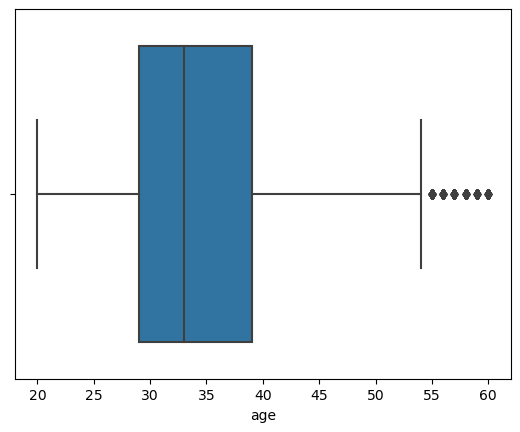

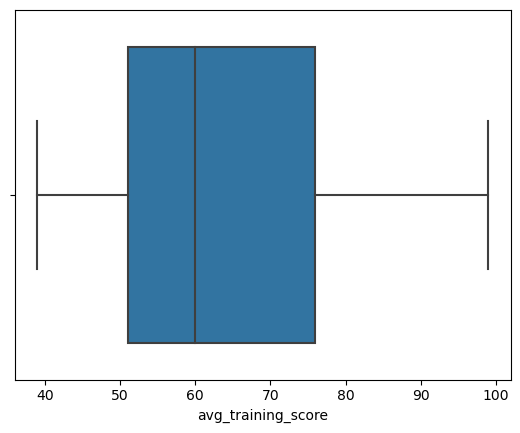

In [203]:
num_cols_test = ['age', 'avg_training_score' ]

def capping_outlier(col):
    q1 = np.percentile(df_test[col],25)
    q3 = np.percentile(df_test[col],75)

    iqr = q3 - q1

    lower_bond = q1 - 1.5 * iqr
    upper_bond = q3 + 1.5 * iqr

    df[col] = np.clip(df_test[col], lower_bond, upper_bond)


for column in num_cols_test:
    capping_outlier(column)
    sns.boxplot(x=df_test[column], orient='h')
    plt.show()

### Label Encoding

In [204]:
cat_cols_test = df_test.select_dtypes(include='object').columns.to_list()

df_test[cat_cols_test] = df_test[cat_cols_test].apply(LabelEncoder().fit_transform)

In [205]:
df_test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8,18,0,1,2,1,24,3.0,1,1,0,77
1,2,28,0,0,0,1,31,3.0,5,0,0,51
2,7,4,0,1,0,1,31,1.0,4,0,0,47
3,5,11,0,0,0,3,31,2.0,9,0,0,65
4,1,21,0,1,2,1,30,4.0,7,0,0,61


### Standardize the data

In [206]:
columns_to_Standardize = df_test.columns

scalar = StandardScaler()

scalar.fit(df_test[columns_to_Standardize])

df_test[columns_to_Standardize] = scalar.transform(df_test[columns_to_Standardize])

In [207]:
df_test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1.206058,0.290490,-0.637366,0.644516,1.154134,-0.423094,-1.404150,-0.257191,-1.143200,1.336715,-0.152665,1.024263
1,-1.180154,1.436621,-0.637366,-1.551551,-0.883722,-0.423094,-0.492612,-0.257191,-0.192590,-0.748103,-0.152665,-0.914377
2,0.808356,-1.314094,-0.637366,0.644516,-0.883722,-0.423094,-0.492612,-1.900667,-0.430243,-0.748103,-0.152665,-1.212629
3,0.012952,-0.511802,-0.637366,-1.551551,-0.883722,2.905264,-0.492612,-1.078929,0.758019,-0.748103,-0.152665,0.129506
4,-1.577856,0.634329,-0.637366,0.644516,1.154134,-0.423094,-0.622832,0.564547,0.282714,-0.748103,-0.152665,-0.168746


### Apply PCA on test data

In [208]:
pca = PCA(n_components=10)

pca.fit(df_test)

PCA(n_components=10)

In [209]:
pca_data_test = pca.transform(df_test)

In [210]:
# Make dataframe of PCA

new_df_test = pd.DataFrame(pca_data_test, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

In [211]:
new_df_test.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.905481,0.193921,-0.735059,0.497830,-0.148573,-0.809482,0.577729,0.013344,-0.853888,1.907234
1,-0.730900,-0.366646,-0.110565,-1.307835,0.604867,-0.711829,-1.370244,0.275379,1.258937,-1.475155
2,-0.351880,-2.455717,-0.434785,-0.274617,0.159382,1.250093,-0.132006,-1.203231,-0.536143,0.003138


In [212]:
y_pred_test = grid_search.best_estimator_.predict(new_df_test)

In [213]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [214]:
y_pred_df = pd.DataFrame(y_pred_test, columns=['is_promoted'])

In [215]:
y_pred_df['employee_id'] = imp_id

In [216]:
y_pred_df

,is_promoted,employee_id
0,0,8724
1,0,74430
2,0,72255
3,0,38562
4,0,64486
...,...,...
23485,0,53478
23486,0,25600
23487,0,45409
23488,0,1186


In [219]:
col_c = y_pred_df.pop('is_promoted')
y_pred_df['is_promoted'] = col_c

In [220]:
y_pred_df

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [221]:
y_pred_df.to_csv('HR_PCA_DATA.csv', index=False)